# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [33]:
#Sua resposta aqui

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/carros.csv") #carregar o csv
dfn = df.dropna(axis=0)
dfn.head(15)
dfn.info()

#Existem 32,200 dados no CSV
#Há 8 atributos
#Existem! Por isso, usei a função dropna com o atributo axis para fazer o tratamento e apagar as linhas com dados faltantes
#float64(2), int64(2), object(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage/1000  4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
 8   Model         4025 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 314.5+ KB


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [34]:
#Sua resposta aqui
dfn['Km'] = (dfn['Mileage/1000']*1000) * 1.60934
dfn = dfn.rename(columns={'Mileage/1000)': 'Km'})
dfn = dfn.drop('Mileage/1000', axis=1)

novo_cabecalho = ['Marca', 'Preço', 'Tipo', 'Cilindrada', 'Combustivel', 'Registrado', 'Ano', 'Modelo', 'Km' ]

dfn.columns = novo_cabecalho
dfn

,Marca,Preço,Tipo,Cilindrada,Combustivel,Registrado,Ano,Modelo,Km
0,BMW,4200.0,sedan,2.0,Petrol,yes,1991,320,445787.18
1,Mercedes-Benz,7900.0,van,2.9,Diesel,yes,1999,Sprinter 212,687188.18
2,Mercedes-Benz,13300.0,sedan,5.0,Gas,yes,2003,S 500,576143.72
3,Audi,23000.0,crossover,4.2,Petrol,yes,2007,Q7,386241.60
4,Toyota,18300.0,crossover,2.0,Petrol,yes,2011,Rav 4,193120.80
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,1.6,Petrol,yes,2014,Corolla,56326.90
4340,Mercedes-Benz,125000.0,sedan,3.0,Diesel,yes,2014,S 350,14484.06
4341,BMW,6500.0,sedan,3.5,Petrol,yes,1999,535,1609.34
4342,BMW,8000.0,sedan,2.0,Petrol,yes,1985,520,312211.96


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

,Preço,Cilindrada,Ano,Km
count,4025.000000,4025.000000,4025.000000,4.025000e+03
mean,19552.308065,2.764586,2006.379627,2.632432e+05
std,25815.734988,4.935941,6.695595,1.663972e+05
min,600.000000,0.600000,1969.000000,0.000000e+00
25%,6999.000000,1.800000,2003.000000,1.448406e+05
50%,11500.000000,2.200000,2007.000000,2.542757e+05
75%,21900.000000,3.000000,2012.000000,3.701482e+05
max,300000.000000,99.990000,2016.000000,1.577153e+06


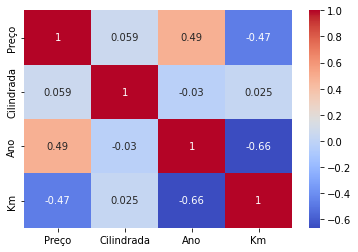

In [17]:
#Sua resposta aqui
import matplotlib.pyplot as plt
corr = dfn.corr()


sns.heatmap(corr, annot=True, cmap='coolwarm')

dfn.describe()


# Mostrando relação de Ano - Preço
# plt.scatter(dfn['Year'], dfn['Price'])
# plt.xlabel('Year')
# plt.ylabel('Price')
# plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

Resposta: Regressão, pois a saída esperada é um valor númerico, no caso, o valor de carros.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: Entender quais atributos estão mais relacionados com o valor do carro, pois eles podem auxiliar na predição, já que possivelmente terão relação com o preço. No caso, pelo que analisei, o atributo em que mais se relaciona com o valor do carro seria o ano de fabricação conforme visto no exemplo a cima.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão linear simples

Algoritmo 2: RandomForestRegressor

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [18]:
from sklearn.model_selection import train_test_split

X = dfn[['Ano']]
y = dfn[['Preço']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [19]:
#Sua resposta aqui
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('r2: ' + str(r2_score(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(mean_absolute_error(y_test, y_pred))))   

r2: 0.2545843656393343
RMSE: 111.50177249468928


7.2 - Algoritmo 2:  (0,5)

In [22]:
#Sua resposta aqui
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('r2: ' + str(r2_score(y_test, y_pred)))
print('RMSE: ' + str(np.sqrt(mean_absolute_error(y_test, y_pred))))

r2: 0.4934137124618504
RMSE: 98.01222561593407


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: o Algoritmo 2, pois ele obteve melhor score.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [25]:
#Sua resposta aqui
np.random.seed(42)
prediction = rf.predict([[2005]])
prediction

# R$10.342,08

array([10342.08638092])